In [1]:
"""
Donnees_FSMS_12.sav CODREG

Donnees_FSMS_2011_juil WILAYA

Donnees_FSMS_2012_juil WILAYA

Donnees_FSMS_2013_dec CODREG

Donnees_FSMS_2014_juin CODREG

"""

'\nDonnees_FSMS_12.sav CODREG\n\nDonnees_FSMS_2011_juil WILAYA\n\nDonnees_FSMS_2012_juil WILAYA\n\nDonnees_FSMS_2013_dec CODREG\n\nDonnees_FSMS_2014_juin CODREG\n\n'

In [2]:
import pandas as pd
import pyreadstat as py
import glob
import re

In [3]:
paths = 'FSMS\work\*'
glob.glob(paths)

['FSMS\\work\\Données FSMS 13Dec_20_01_14.sav',
 'FSMS\\work\\Données FSMS Jan16_18_02.sav',
 'FSMS\\work\\Données_FSMS_16_08_11.sav',
 'FSMS\\work\\Données_FSMS_24_06_15.sav',
 'FSMS\\work\\Données_FSMS_juil_12.sav',
 'FSMS\\work\\Données_FSMS_juin_15.sav',
 'FSMS\\work\\Données_FSMS_juin_2014.sav',
 'FSMS\\work\\Données_FSMS_nov11_26_12.sav',
 'FSMS\\work\\FSMS_HH_juil13b_1.sav']

In [4]:
date = []
date = ['29-12-2013','20-01-2016','22-07-2011', '03-06-2015','31-07-2012','31-05-2015','26-06-2014', '07-12-2011', '01-07-2013']

In [5]:
data = []
i = 0
for path in glob.glob(paths):
    try:
        df,_ = py.read_sav(path, encoding="ISO-8859-1")
        df['date'] = date[i]
        df.date=pd.to_datetime(df.date)
        print(date[i])
        #print(df["date"])
        data.append(df)
        i +=1
        
    except:
        print('Erreur de lecture', path)


29-12-2013
20-01-2016
22-07-2011
03-06-2015
31-07-2012
31-05-2015
26-06-2014
07-12-2011
01-07-2013


In [6]:
for i in range(len(data)):
    print(len(data[i].columns))

607
547
446
428
589
375
591
476
530


In [7]:
#Verification des dates
for i in range(9):
    print(f"-------------datadframe {i}/ {date[i]}----------")
    try:
        print('SubmissionDate', data[i].loc[0,'SubmissionDate'])
    except KeyError as e:
        print(e)
    try:
        print('today', 
            data[i].loc[0,'today'])
    except KeyError as e:
        print(e)
    try:
        jour = data[i].loc[0,['DATE_JOUR']].values[0]
        mois = data[i].loc[0,['DATE_MOIS']].values[0]
        année = data[i].loc[0,['DATE_ANN_E']].values[0]
        print('df',jour, mois, année)
    except KeyError as e:
        print(e)
    try:
        print('df',data[i].loc[0,['DATE']].values[0])
    except KeyError as e:
        print(e)
        
    print("")
    print("")

-------------datadframe 0/ 29-12-2013----------
SubmissionDate 29 déc. 2013 14:11:34
today nan
"None of [Index(['DATE_JOUR'], dtype='object')] are in the [index]"
"None of [Index(['DATE'], dtype='object')] are in the [index]"


-------------datadframe 1/ 20-01-2016----------
SubmissionDate 2016-01-20 10:36:15
today 2016-01-19
"None of [Index(['DATE_JOUR'], dtype='object')] are in the [index]"
"None of [Index(['DATE'], dtype='object')] are in the [index]"


-------------datadframe 2/ 22-07-2011----------
'SubmissionDate'
'today'
df 22.0 7.0 2011.0
"None of [Index(['DATE'], dtype='object')] are in the [index]"


-------------datadframe 3/ 03-06-2015----------
'SubmissionDate'
today 2015-06-03
"None of [Index(['DATE_JOUR'], dtype='object')] are in the [index]"
"None of [Index(['DATE'], dtype='object')] are in the [index]"


-------------datadframe 4/ 31-07-2012----------
'SubmissionDate'
'today'
"None of [Index(['DATE_JOUR'], dtype='object')] are in the [index]"
df 30072012


------------

In [8]:
#All data
#frame = [d for d in data]

In [9]:
# Only cattle
frame = []
for i in range(len(data)):
    try:
        mask = (data[i]['Q4_1'] != 0) | (data[i]['Q4_2'] != 0) | (data[i]['Q4_3'] != 0) | (data[i]['Q4_4'] != 0)
        frame.append(data[i][mask])

    except KeyError as e:
        print(e, len(data[i].columns))


In [10]:
for i in range(len(frame)):
    frame[i].reset_index(drop=True, inplace=True)

In [12]:
try:
    for i in range(len(frame)):
        column_list = frame[i].columns.to_list()
        if 'CODREG' in column_list:
            print(f"frame {i} / {frame[i]['date'][0]} [wilaya = CODREG]")
        elif 'wilaya' in column_list:  
            print(f"frame {i} / {frame[i]['date'][0]} [wilaya = wilaya]")
        elif 'WILAYA' in column_list:  
            print(f"frame {i} / {frame[i]['date'][0]} [wilaya = WILAYA]")
except KeyError as e:
    print(e)
    

frame 0 / 2013-12-29 00:00:00 [wilaya = CODREG]
frame 1 / 2016-01-20 00:00:00 [wilaya = wilaya]
frame 2 / 2011-07-22 00:00:00 [wilaya = WILAYA]
frame 3 / 2015-03-06 00:00:00 [wilaya = wilaya]
frame 4 / 2012-07-31 00:00:00 [wilaya = WILAYA]
frame 5 / 2015-05-31 00:00:00 [wilaya = wilaya]
frame 6 / 2014-06-26 00:00:00 [wilaya = CODREG]
frame 7 / 2011-07-12 00:00:00 [wilaya = WILAYA]
frame 8 / 2013-01-07 00:00:00 [wilaya = CODREG]


In [13]:
for i in range(len(frame)):
    column_list = frame[i].columns.to_list()
    if 'CODREG' in column_list:
        frame[i].rename(columns={'CODREG': 'wilaya'}, inplace=True)
    elif 'WILAYA' in column_list:  
        frame[i].rename(columns={'WILAYA': 'wilaya'}, inplace=True)

C:\Users\froge\.conda\envs\analyse\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
for i in range(len(frame)):
    print(sorted(frame[i]['wilaya'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


In [15]:
for i in range(len(frame)):
    column_list = frame[i].columns.to_list()
    try:
        if 'wilaya' in column_list:  
            print(f"frame {i} / {frame[i]['date'][6]} [wilaya = ok]")
    except KeyError as e:
        print(e)

frame 0 / 2013-12-29 00:00:00 [wilaya = ok]
frame 1 / 2016-01-20 00:00:00 [wilaya = ok]
frame 2 / 2011-07-22 00:00:00 [wilaya = ok]
frame 3 / 2015-03-06 00:00:00 [wilaya = ok]
frame 4 / 2012-07-31 00:00:00 [wilaya = ok]
frame 5 / 2015-05-31 00:00:00 [wilaya = ok]
frame 6 / 2014-06-26 00:00:00 [wilaya = ok]
frame 7 / 2011-07-12 00:00:00 [wilaya = ok]
frame 8 / 2013-01-07 00:00:00 [wilaya = ok]


In [16]:
frame[1]['wilaya'].apply(lambda x: 13 if x == 14  else x)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2266    15.0
2267    15.0
2268    15.0
2269    15.0
2270    15.0
Name: wilaya, Length: 2271, dtype: float64

In [17]:
frame[1]['wilaya'] = frame[1]['wilaya'].apply(lambda x: 13 if x == 14  else x)
frame[1]['wilaya'] = frame[1]['wilaya'].apply(lambda x: 13 if x == 15  else x)

<ipython-input-17-b22b124320ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[1]['wilaya'] = frame[1]['wilaya'].apply(lambda x: 13 if x == 14  else x)
<ipython-input-17-b22b124320ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[1]['wilaya'] = frame[1]['wilaya'].apply(lambda x: 13 if x == 15  else x)


In [18]:
for i in range(len(frame)):
    print(sorted(frame[i]['wilaya'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


In [33]:
wilaya_frame = pd.DataFrame(columns=["date", "wilaya", "FCS<42", "Ratio",'pop_wilaya_tt', "Pop_echa"])
for i in range(len(frame)):
    num = len(frame[i]['wilaya'].unique())
    for n in range(num):
        pop = len(frame[i])
        fcs_df = frame[i].loc[frame[i]['wilaya'] == n+1]
        date = frame[i]['date'][0]
        FCS = (fcs_df['FCS'] < 42).sum()
        if FCS == 0:
            ratio = 0
        else:
            ratio = ((fcs_df['FCS'] < 42).sum()) / (len(fcs_df))
            wilaya_frame = wilaya_frame.append({'date' : date, 'wilaya' : n, 'FCS<42' : FCS, 'Ratio': ratio, 'pop_wilaya_tt':len(fcs_df),'Pop_echa': pop, }, ignore_index=True)

In [34]:
wilaya_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           105 non-null    datetime64[ns]
 1   wilaya         105 non-null    object        
 2   FCS<42         105 non-null    object        
 3   Ratio          105 non-null    float64       
 4   pop_wilaya_tt  105 non-null    object        
 5   Pop_echa       105 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.0+ KB


In [35]:
wilaya_frame.to_csv('wilaya_ia_2012-2014.csv')

In [36]:
wilaya_frame.head(20)

,date,wilaya,FCS<42,Ratio,pop_wilaya_tt,Pop_echa
0,2013-12-29,0,41,0.200980,204,2305
1,2013-12-29,1,6,0.024896,241,2305
2,2013-12-29,2,36,0.155172,232,2305
3,2013-12-29,3,77,0.286245,269,2305
4,2013-12-29,4,20,0.078431,255,2305
5,2013-12-29,5,9,0.040724,221,2305
6,2013-12-29,6,18,0.108434,166,2305
7,2013-12-29,7,3,0.053571,56,2305
8,2013-12-29,8,7,0.029289,239,2305
9,2013-12-29,9,32,0.135021,237,2305


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

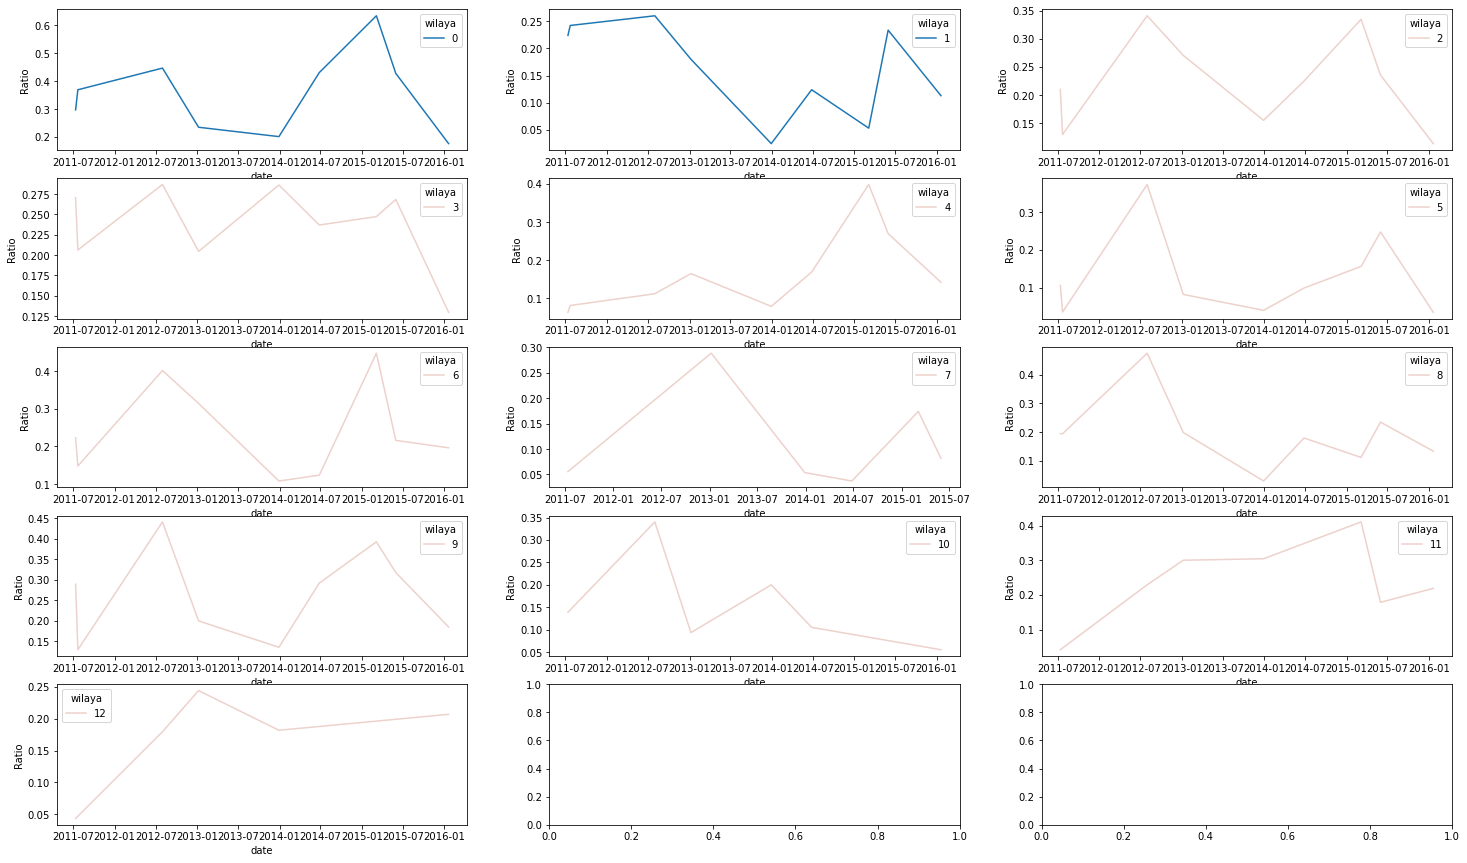

In [54]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(25,15))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13,ax14,ax15]
for i in range(14):
    filtre = wilaya_frame[wilaya_frame["wilaya"] == i]
    sns.lineplot(data=filtre, x="date", y="Ratio", hue="wilaya", legend="full", ax=ax[i])

<AxesSubplot:xlabel='wilaya', ylabel='Ratio'>

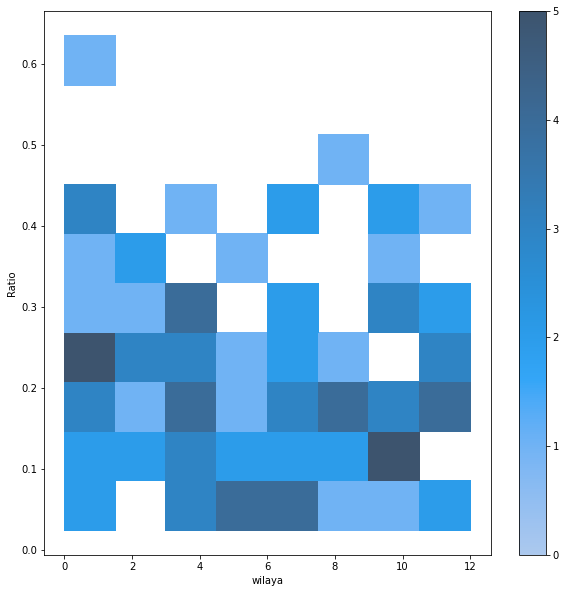

In [93]:
f, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=wilaya_frame, x="wilaya", y="Ratio", cbar=True)